### Test case LVV-T37: Verify implementation of Difference Exposure Attributes

Verify that for each Difference Exposure the DMS stores
1. The identify of the input exposures and related provenance information
2. Metadata attributes of the subtraction, including the PSF-matching kernel used.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from lsst.daf.butler import Butler
import lsst.afw.display as afwDisplay
import lsst.afw.image as afwImage

In [4]:
butler = Butler('/repo/main', collections="LSSTCam/runs/DRP/20250501_20250609/w_2025_30/DM-51933")

#### Retrieve a difference image in each of the ugrizy bands:

Select a single `difference_image` in each band. Specify only a band and a single detector, and limit the query results to return only one dataset reference.

In [5]:
diffim_refs_dict = {}
bands_list = ['u', 'g', 'r', 'i', 'z', 'y']
for band in bands_list:
    diffim_refs_dict[band] = butler.query_datasets('difference_image', band=band, detector=42,
                                                   skymap='lsst_cells_v1', limit=1)

In [6]:
diffim_refs_dict

{'u': [DatasetRef(DatasetType('difference_image', {band, instrument, day_obs, detector, physical_filter, visit}, ExposureF), {instrument: 'LSSTCam', detector: 42, visit: 2025050100464, band: 'u', day_obs: 20250501, physical_filter: 'u_24'}, run='LSSTCam/runs/DRP/20250501_20250609/w_2025_30/DM-51933/20250810T211051Z', id=98e6a820-abc1-4ba3-9d3e-ba1f6337ede2)],
 'g': [DatasetRef(DatasetType('difference_image', {band, instrument, day_obs, detector, physical_filter, visit}, ExposureF), {instrument: 'LSSTCam', detector: 42, visit: 2025050100371, band: 'g', day_obs: 20250501, physical_filter: 'g_6'}, run='LSSTCam/runs/DRP/20250501_20250609/w_2025_30/DM-51933/20250810T211051Z', id=ae96af5b-daf1-4845-b639-8e0ba301c52d)],
 'r': [DatasetRef(DatasetType('difference_image', {band, instrument, day_obs, detector, physical_filter, visit}, ExposureF), {instrument: 'LSSTCam', detector: 42, visit: 2025050100309, band: 'r', day_obs: 20250501, physical_filter: 'r_57'}, run='LSSTCam/runs/DRP/20250501_20250

#### Display an image

In [7]:
diffim_i = butler.get(diffim_refs_dict['i'][0])

In [8]:
afwDisplay.setDefaultBackend('matplotlib')

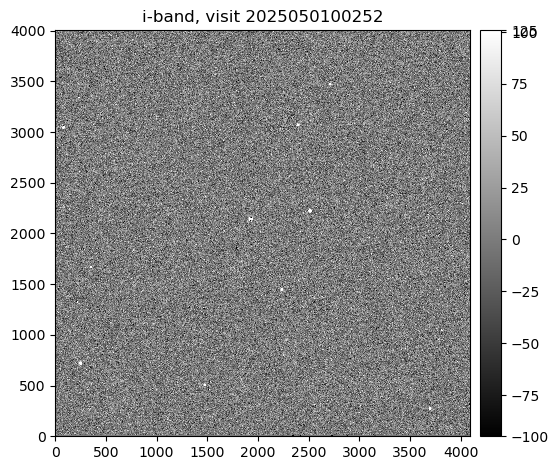

In [9]:
fig = plt.figure()

display0 = afwDisplay.Display(frame=fig)
display0.scale('linear', 'zscale')
display0.mtv(diffim_i.image)
plt.title(f"i-band, visit {diffim_refs_dict['i'][0].dataId['visit']}")

plt.tight_layout()
plt.show()

The image is well-formed, with an average pixel value around zero as expected for a difference image.

#### Examine the metadata for a difference image

In [10]:
# Print the dataset type of the diffim:
print(type(diffim_i))

# Print the WCS:
diffim_i.wcs

<class 'lsst.afw.image._exposure.ExposureF'>


FITS standard SkyWcs:
Sky Origin: (186.5369088226, +7.2334074012)
Pixel Origin: (64208, -29129.2)
Pixel Scale: 2.42545 arcsec/pixel

In [11]:
diffim_i.visitInfo

VisitInfo(exposureTime=30.0011, darkTime=30.9446, date=2025-05-02T00:31:21.783650645, UT1=nan, ERA=3.97143 rad, boresightRaDec=(186.5369088226, +7.2334074012), boresightAzAlt=(42.4058042295, +43.0014669006), boresightAirmass=1.46466, boresightRotAngle=2.41787 rad, rotType=1, observatory=-30.2446N, -70.7494E  2663, weather=Weather(10, 74375, 24.35), instrumentLabel='LSSTCam', id=2025050100252, focusZ=-3.56441, observationType='science', scienceProgram='BLOCK-365', observationReason='field_survey_science', object='M49', hasSimulatedContent=false)

Like all ExposureF objects produced by the LSST Science Pipelines, this `difference_image` also contains a PSF, photometric calibration, a mask plane, and various other useful information.

Next we print the metadata to the screen:

In [12]:
diffim_i.metadata

BINX = 1
// [pixels] binning along X axis
BINY = 1
// [pixels] binning along Y axis
CCDGAIN = 1.0000000000000
// Rough guess at overall system gain (e-/DNB)
CCDNOISE = 10.000000000000
// Rough guess at system noise (e- rms)
DETSIZE = "[1:4096,1:4004]"
DATE = "2025-05-02T00:31:37.253"
// Creation Date and Time of File
MJD = 60797.021958951
// Modified Julian Date that the file was written
IMGTYPE = "OBJECT"
// BIAS, DARK, FE55, FLAT, FLAT_<lam>, SPOT, PPUMP
DATE-TRG = "2025-05-02T00:31:37.249"
// TAI Date of the image trigger (readout)
MJD-TRG = 60797.021958902
// Modified Julian Date of image trigger
OBSID = "MC_O_20250501_000252"
// The image name or obs-id
DATE-BEG = "2025-05-02T00:31:06.311"
// Time at the start of integration
MJD-BEG = 60797.021600825
// Modified Julian Date derived from DATE-BEG
DATE-END = "2025-05-02T00:31:37.256"
// End date of the observation
MJD-END = 60797.021958980
// Date derived from DATE-END
GROUPID = "2025-05-02T00:30:50.014"
INSTRUME = "lsstCam"
// Inst

We see that the above metadata includes the uuids (unique identifiers) of the template and visit images that were used for the differencing, as well as information about the resulting image's properties.

#### Confirm that the inputs to the template can be retrieved

In [13]:
template_img = butler.get('template_detector', dataId=diffim_refs_dict['i'][0].dataId, skymap='lsst_cells_v1')

In [14]:
template_img.metadata

LSST BUTLER ID = "1a46124f-30f0-4579-9e0d-4b6d5977184d"
// Dataset ID
LSST BUTLER RUN = "LSSTCam/runs/DRP/20250501_20250609/w_2025_30/DM-51933/20250810T211051Z"
// Run collection
LSST BUTLER DATASETTYPE = "template_detector"
// Dataset type
LSST BUTLER DATAID DETECTOR = 42
// Data identifier
LSST BUTLER DATAID INSTRUMENT = "LSSTCam"
// Data identifier
LSST BUTLER DATAID VISIT = 2025050100252
// Data identifier
LSST BUTLER QUANTUM = "8725e925-a97e-4546-864b-77777f066c1e"
LSST BUTLER INPUT 0 ID = "5c9ac0c2-a75e-4269-9102-70f831bc0b6f"
// Dataset ID
LSST BUTLER INPUT 0 RUN = "LSSTCam/runs/DRP/20250501_20250609/w_2025_30/DM-51933/20250810T211051Z"
// Run collection
LSST BUTLER INPUT 0 DATASETTYPE = "visit_image.bbox"
// Dataset type
LSST BUTLER INPUT 1 ID = "22925afb-26cd-45db-a9c3-b632c33e20b1"
// Dataset ID
LSST BUTLER INPUT 1 RUN = "skymaps"
// Run collection
LSST BUTLER INPUT 1 DATASETTYPE = "skyMap"
// Dataset type
LSST BUTLER INPUT 2 ID = "3f4f8ee2-622d-4ef2-aa25-cdc9cb3bae98"
// Dat

#### Examine the difference kernel that was used in the differencing

This can be retrieved using the same dataId that was used to retrieve the `difference_image`.

In [15]:
kernel = butler.get('difference_kernel', dataId=diffim_refs_dict['i'][0].dataId)

In [16]:
image = afwImage.ImageD(kernel.getDimensions())
kernel_sum = kernel.computeImage(image, doNormalize=False, x=100.0, y=100.0)

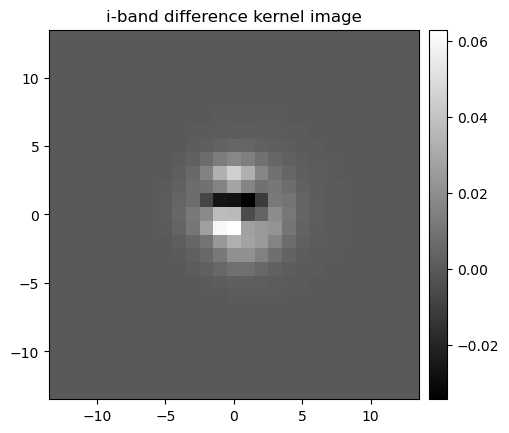

In [17]:
fig = plt.figure()

display1 = afwDisplay.Display(frame=fig)
display1.mtv(image)
plt.title("i-band difference kernel image")

plt.show()

## Result

We have confirmed that the DMS produces well-formed difference images, along with provenance and other metadata information, and that the necessary information to recreate the difference image (including provenance and the difference kernel) is available. The result of this test is a **Pass**.